<a href="https://colab.research.google.com/github/yonatanlou/study_projects/blob/main/Statistics_lab/labs/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 3

In [ ]:
# Import modules 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(42)


pd.get_option("display.max_columns")

0

In [ ]:
data_url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistical_learning_and_data%20analysis/votes_per_ballot_2021.csv"
votes_per_ballot = pd.read_csv(data_url,  encoding = 'iso-8859-8', index_col='שם ישוב')

df = votes_per_ballot


#### Q1

#### Data preparation

In [ ]:
parties_dict ={'אמת': 'עבודה',
 'ב': 'ימינה',
 'ג': 'יהדות התורה',
 'ודעם': 'הרשימה המשותפת',
 'ט': 'הציונות הדתית',
 'כן': 'כחול לבן',
 'ל': 'ישראל ביתנו',
 'מחל': 'הליכוד',
 'מרצ': 'מרצ',
 'עם': 'רעם',
 'פה': 'יש עתיד',
 'שס': 'שס',
 'ת': 'תקוה חדשה'}
##relevant 13 parties

In [ ]:
total_counted = df['כשרים'].sum()

isInKnesset = (df.sum(axis=0)/total_counted > 0.0325).to_dict()
inKnessetParties = [i for i in isInKnesset.keys() if isInKnesset[i] is True]
knesset_parties = df[inKnessetParties]

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,בזב,מצביעים,כשרים,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,6,3238,1220,1.0,1,221,151,150,47,0,0,3,2,16,2,5,31,0,27,1,8
אדירים,5,1788,113,1.0,1,234,180,180,1,7,4,0,9,3,0,84,0,0,2,61,6
אושה,8,4113,278,1.0,1,382,276,276,72,7,0,3,0,37,8,24,20,0,86,0,15
אחווה,17,10449,1157,1.0,1,183,145,145,14,4,0,0,4,36,3,27,10,0,37,2,8
איבים,17,10450,338,1.0,1,138,40,40,0,4,0,0,10,5,0,17,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
מעטפות חיצוניות,99,99057,9999,1057.0,0,0,551,543,32,81,2,7,22,30,47,141,22,4,93,16,39
מעטפות חיצוניות,99,99058,9999,1058.0,0,0,553,550,31,73,2,5,22,27,36,200,22,1,76,11,40
מעטפות חיצוניות,99,99059,9999,1059.0,0,0,548,539,43,50,8,5,22,27,74,123,19,0,96,12,47


In [ ]:
# Here I adjusted the dataframe to be the every cell is the supporters of each party in each ballot

total_bzb = df['בזב'].sum()
total_kosher = df['כשרים'].sum()
knesset_parties = (knesset_parties*total_bzb)/total_kosher
knesset_parties = knesset_parties.round()
knesset_parties = knesset_parties.loc[~knesset_parties.index.str.fullmatch('מעטפות חיצוניות')]
knesset_parties = knesset_parties[knesset_parties.columns[8:]]
 ##Dataset fixed to supporters as required and withwout מעטפות חיצוניות.


,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,70.0,0.0,0.0,4.0,3.0,24.0,3.0,7.0,46.0,0.0,40.0,1.0,12.0
אדירים,1.0,10.0,6.0,0.0,13.0,4.0,0.0,125.0,0.0,0.0,3.0,91.0,9.0
אושה,107.0,10.0,0.0,4.0,0.0,55.0,12.0,36.0,30.0,0.0,128.0,0.0,22.0
אחווה,21.0,6.0,0.0,0.0,6.0,54.0,4.0,40.0,15.0,0.0,55.0,3.0,12.0
איבים,0.0,6.0,0.0,0.0,15.0,7.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,133.0,27.0,0.0,1.0,4.0,109.0,15.0,48.0,146.0,0.0,224.0,0.0,22.0
שורשים,89.0,28.0,0.0,4.0,1.0,57.0,10.0,48.0,31.0,0.0,121.0,0.0,37.0
שכניה,151.0,25.0,0.0,4.0,6.0,91.0,18.0,21.0,101.0,0.0,180.0,1.0,54.0


The main function:

In [ ]:
# df2a = df
# df2a['percent_A'] = df2a['כשרים']/df2a['בזב']
# df2a = df2a.loc[~df2a.index.str.fullmatch('מעטפות חיצוניות')]
# per_A = df2a['percent_A']
# knesset_parties


In [ ]:
#works for A and B, maybe C
def binomialSample(df, v):
  df_numpy = df.to_numpy().astype(int) #df in numpy for func
      
  if v.size == 12127 : ##sim1
    v_df = pd.concat([v] * (len(knesset_parties.columns)), axis=1, ignore_index=True)# make a df of percenteges
    v_numpy = v_df.to_numpy().astype(float) #df of percent to numpy
    f1_result = np.random.binomial(df_numpy,v_numpy)
    return f1_result
  
  if v.size == 13 :#sim2
    v_df = pd.concat([v] * (len(knesset_parties)), axis=0, ignore_index=True)
    v_numpy = v_df.to_numpy().astype(float) #df of percent to numpy
    f1_result = np.random.binomial(df_numpy,v_numpy)
    return f1_result

  ##sim3
  f1_result = np.random.binomial(df_numpy,v)
  return f1_result
 

#Q2


#### Simulation 1

In [ ]:
##creating vector of % in each ballot to send to the sim
df2a = votes_per_ballot
df2a['percent_A'] = df2a['כשרים']/df2a['בזב']
df2a = df2a.loc[~df2a.index.str.fullmatch('מעטפות חיצוניות')]
per_A = df2a['percent_A']

In [ ]:
df_sim1 = knesset_parties*0 #df that will have the results after each sim
for x in range(50) :
  df_sim1 = df_sim1 +binomialSample(knesset_parties,per_A)
df_sim1 = df_sim1/50
df_sim1  

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,70.0,0.0,0.0,4.0,3.0,24.0,3.0,7.0,46.0,0.0,40.0,1.0,12.0
אדירים,1.0,10.0,6.0,0.0,13.0,4.0,0.0,125.0,0.0,0.0,3.0,91.0,9.0
אושה,107.0,10.0,0.0,4.0,0.0,55.0,12.0,36.0,30.0,0.0,128.0,0.0,22.0
אחווה,21.0,6.0,0.0,0.0,6.0,54.0,4.0,40.0,15.0,0.0,55.0,3.0,12.0
איבים,0.0,6.0,0.0,0.0,15.0,7.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,133.0,27.0,0.0,1.0,4.0,109.0,15.0,48.0,146.0,0.0,224.0,0.0,22.0
שורשים,89.0,28.0,0.0,4.0,1.0,57.0,10.0,48.0,31.0,0.0,121.0,0.0,37.0
שכניה,151.0,25.0,0.0,4.0,6.0,91.0,18.0,21.0,101.0,0.0,180.0,1.0,54.0


#### Simulation 2

preperation to send to func
Icreated the vector of voting % per party based on a few assumptions.
1) ultra religous vote alot because that what the rabbis tell them to.
2) Arabs voted in small percentges
3) the samller the party is, more likly for a supporter to actually, and the same on the other direction.
4) new parties will get a high percentge of votes from their supporters.

In [ ]:
knesset_parties
per_b = [0.65,0.65,0.75,0.4,0.7,0.6,0.7,0.5,0.75,0.55,0.55,0.7,0.65]

per_b2 = pd.DataFrame(per_b,columns=['Percentge of vote'])
per_b2 = per_b2.T
type(per_b2)

pandas.core.frame.DataFrame

In [ ]:
df_sim2 = knesset_parties*0 #df that will have the results after each sim
for x in range(50) :
  df_sim2 = df_sim2 +binomialSample(knesset_parties,per_b2)
df_sim2 = df_sim2/50
df_sim2  


,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,46.82,0.00,0.00,1.56,1.92,14.10,2.10,3.44,34.74,0.0,23.16,0.86,7.64
אדירים,0.74,6.52,4.62,0.00,9.00,2.24,0.00,62.24,0.00,0.0,1.74,64.36,5.74
אושה,69.04,6.46,0.00,1.58,0.00,32.74,8.30,17.58,22.24,0.0,71.24,0.00,14.28
אחווה,13.76,3.96,0.00,0.00,4.36,32.44,2.62,20.14,11.16,0.0,30.16,1.78,7.22
איבים,0.00,3.74,0.00,0.00,10.86,4.02,0.00,12.86,0.00,0.0,0.00,0.68,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,87.32,17.58,0.00,0.40,2.98,65.72,10.48,23.80,109.06,0.0,124.16,0.00,14.50
שורשים,57.52,18.34,0.00,1.54,0.80,34.82,7.18,24.04,23.36,0.0,64.62,0.00,23.92
שכניה,97.82,16.14,0.00,1.74,4.20,55.56,12.76,10.98,76.74,0.0,98.90,0.80,35.86


#### Simulation 3

data preperation - building matrix

In [ ]:
import itertools
per_b = [0.65,0.65,0.75,0.4,0.7,0.6,0.7,0.5,0.75,0.55,0.55,0.7,0.65]
import random
def perm_generator(seq):
    seen = set()
    length = len(seq)
    while True:
        perm = tuple(random.sample(seq, length))
        if perm not in seen:
            seen.add(perm)
            yield perm


rand_perms = perm_generator(per_b)

j = [next(rand_perms) for _ in range(12127)]






In [ ]:
per_3 = np.asarray(j)
type(per_3)


numpy.ndarray

In [ ]:
df_sim3 = knesset_parties*0 #df that will have the results after each sim
for x in range(50) :
  df_sim3 = df_sim3 +binomialSample(knesset_parties,per_3)
df_sim3 = df_sim3/50
df_sim3  


,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,38.14,0.00,0.00,2.84,1.24,18.34,1.98,3.98,29.40,0.0,30.16,0.70,5.86
אדירים,0.72,6.16,2.38,0.00,9.68,2.44,0.00,87.18,0.00,0.0,1.50,54.40,6.80
אושה,69.96,6.40,0.00,2.78,0.00,37.92,7.44,20.36,16.16,0.0,52.64,0.00,10.80
אחווה,12.52,3.66,0.00,0.00,3.72,26.98,2.26,30.24,5.90,0.0,41.58,1.76,8.06
איבים,0.00,2.28,0.00,0.00,10.38,5.16,0.00,14.30,0.00,0.0,0.00,0.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,79.54,20.10,0.00,0.64,2.94,80.78,8.10,34.04,58.72,0.0,109.80,0.00,14.14
שורשים,62.10,20.12,0.00,2.06,0.66,37.74,7.40,19.06,20.32,0.0,67.40,0.00,27.54
שכניה,114.00,15.96,0.00,2.32,4.22,59.36,8.90,8.68,70.56,0.0,125.48,0.68,29.92


#### 2.b

Expected Value for each party in each simulation

In [ ]:
#df_sim1
sums = df_sim1.select_dtypes(pd.np.number).sum().rename('Simulation 1')
df_sim1 = df_sim1.append(sums)


In [ ]:
#df_sim2
sums2 = df_sim2.select_dtypes(pd.np.number).sum().rename('Simulation 2')
df_sim2 = df_sim2.append(sums2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [ ]:
#df_sim3
sums3 = df_sim3.select_dtypes(pd.np.number).sum().rename('Simulation 3')
df_sim3 = df_sim3.append(sums3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


number of total votes for the top 13 parties, in each of the 3 simulations

In [ ]:
merged = df_sim1.append(sums2)
merged = merged.append(sums3)
merged = merged.iloc[12127:12130]


#### 2b final answer

estimators for each party in each simulation (the mean from each 50 samples).

In [ ]:
res = merged.div(merged.sum(axis=1), axis=0)
res

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
Simulation 1,0.062292,0.063048,0.065741,0.037812,0.053778,0.071225,0.051757,0.243458,0.047024,0.030532,0.148357,0.076346,0.048631
Simulation 2,0.064743,0.064668,0.074632,0.034206,0.058930,0.067733,0.065665,0.205381,0.057758,0.037526,0.130259,0.086904,0.051594
Simulation 3,0.059459,0.059928,0.059546,0.051480,0.050213,0.067690,0.056116,0.244924,0.046137,0.040725,0.142022,0.074252,0.047507


#### 2.c

####Average

multiply each cell by the suppoters of total supporters of taht party


In [ ]:
knesset_parties_avg = knesset_parties.sum(axis=0)
knesset_parties_avg = knesset_parties_avg.T
knesset_parties_avg.sum()

5849530.0

In [ ]:
qhat_avg = knesset_parties_avg*res
qhat_avg.iloc[0]

אמת      21708.557812
ב        21957.029208
ג        22897.258084
ודעם     11315.436954
ט        15847.404715
כן       28148.829550
ל        16997.951162
מחל     349924.686470
מרצ      12676.467255
עם        7292.899390
פה      122962.821535
שס       33168.110249
ת        13513.869434
Name: Simulation 1, dtype: float64

###variance


Because it is a binomi, we will multiply the expected value by 1-p of each value

In [ ]:
minus_p_df = 1-res 
q_hat_var = qhat_avg*minus_p_df
q_hat_var

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
Simulation 1,20356.289407,20572.674746,21391.973993,10887.580250,14995.160301,26143.924285,16118.195167,264732.586933,12080.368143,7070.235525,104720.479013,30635.865649,12856.679040
Simulation 2,21101.902953,21064.756511,24054.172439,9886.213600,16342.249147,24955.669435,20149.714700,234567.765320,14670.848130,8627.325908,93899.963857,34473.941619,13597.483264
Simulation 3,19489.212048,19619.685377,19504.820190,14612.744747,14053.916138,24940.814552,17395.422644,265810.449100,11863.519941,9331.485919,100995.027468,29863.219927,12574.362744


###Bias

To calculate Bias, from the formula, we will reduce from q hat, the actual q.

In [ ]:
total_counted = df['כשרים'].sum()

isInKnesset = (df.sum(axis=0)/total_counted > 0.0325).to_dict()
inKnessetParties = [i for i in isInKnesset.keys() if isInKnesset[i] is True]

In [ ]:
actual_Q = df[inKnessetParties]
actual_Q = actual_Q.loc[~actual_Q.index.str.fullmatch('מעטפות חיצוניות')]
actual_Q = actual_Q[actual_Q.columns[8:]]
actual_Q ##Real results for 13 parties



,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת,percent_A
שם ישוב,,,,,,,,,,,,,,
אבירים,47,0,0,3,2,16,2,5,31,0,27,1,8,0.678733
אדירים,1,7,4,0,9,3,0,84,0,0,2,61,6,0.769231
אושה,72,7,0,3,0,37,8,24,20,0,86,0,15,0.722513
אחווה,14,4,0,0,4,36,3,27,10,0,37,2,8,0.792350
איבים,0,4,0,0,10,5,0,17,0,0,0,1,0,0.289855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,89,18,0,1,3,73,10,32,98,0,150,0,15,0.767188
שורשים,60,19,0,3,1,38,7,32,21,0,81,0,25,0.685579
שכניה,101,17,0,3,4,61,12,14,68,0,121,1,36,0.721232


In [ ]:
temp_df = actual_Q.select_dtypes(pd.np.number).sum().rename('testbias')

temp_df #Real Q



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


אמת          234498.00000
ב            234143.00000
ג            234624.00000
ודעם         201397.00000
ט            198511.00000
כן           265521.00000
ל            220887.00000
מחל          963856.00000
מרצ          181815.00000
עם           160437.00000
פה           556110.00000
שס           292044.00000
ת            187084.00000
percent_A      7375.43511
Name: testbias, dtype: float64

###all of the bias are negative. seems like a mistake, please have a look.

In [ ]:
q_bias = qhat_avg - temp_df
q_bias

,percent_A,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,,
Simulation 1,NaN,-212789.442188,-212185.970792,-211726.741916,-190081.563046,-182663.595285,-237372.170450,-203889.048838,-613931.313530,-169138.532745,-153144.100610,-433147.178465,-258875.889751,-173570.130566
Simulation 2,NaN,-211935.326230,-211621.840204,-208629.818244,-191160.642493,-181145.392265,-238752.190821,-199321.159412,-668660.907190,-166244.845098,-151473.298838,-448146.835320,-254289.007423,-172746.809473
Simulation 3,NaN,-213776.721759,-213272.588668,-213884.197470,-185991.157766,-183714.081055,-238769.372501,-202457.384241,-611824.539871,-169377.658129,-150709.359856,-438397.095985,-259785.524395,-173882.474902


###MSE

###Doesn't seem right as well, based on bias probably because of that.

To calculate MSE, as formula, we will add to the var, the squre of the bias

In [ ]:
q_mse = q_hat_var + q_bias**2
q_mse

,percent_A,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,,
Simulation 1,NaN,4.527937e+10,4.502291e+10,4.482823e+10,3.613101e+10,3.336600e+10,5.634557e+10,4.157076e+10,3.769119e+11,2.860786e+10,2.345312e+10,1.876166e+11,6.701676e+10,3.012660e+10
Simulation 2,NaN,4.491660e+10,4.478382e+10,4.352643e+10,3.654240e+10,3.281367e+10,5.700263e+10,3.972894e+10,4.471076e+11,2.763736e+10,2.294417e+10,2.008357e+11,6.466293e+10,2.984147e+10
Simulation 3,NaN,4.570051e+10,4.548522e+10,4.574647e+10,3.459273e+10,3.375088e+10,5.701084e+10,4.098901e+10,3.743295e+11,2.868880e+10,2.271332e+10,1.921921e+11,6.748855e+10,3.023513e+10


###2D


function for 2d, based on solution of lab 2.

In [ ]:
# def party_bar(q_mean, p, q, sd_q, sd_p):
#         n = 13 # number of parties
#         width = 0.3
        
#         rev_names = [name[::-1] for name in list(names)]
        
#         # bar plot:
#         fig, ax = plt.subplots()  # plt.subplots()
#         q_mean_bar = ax.bar(np.arange(n), q_mean, width, yerr = sd_q, capsize=3, color = "b")
#         q_bar = ax.bar(np.arange(n) + 2*width, q, width, color = "g")
#         p_bar = ax.bar(np.arange(n) + width, p, width, yerr = sd_p, capsize=3, color = "r")
       
        
#         # legend
#         ax.set_ylabel('Votes percent')
#         ax.set_xlabel('Parties Name')
#         ax.set_title('Voters percentage by party - real data VS simulation VS correction')
#         ax.set_xticks(np.arange(n))
#         ax.set_xticklabels(names, rotation = -90)
#         ax.legend((q_mean_bar[0], q_bar[0],p_bar[0]), ("q hat", "q", "p"))
#         plt.xticks(rotation=45)
#         ax.set_xticklabels(rev_names, fontsize=10)
#         plt.show()
        
#         return fig, ax


In [ ]:
def party_bar(q_mean, p, q, sd_q, sd_p):
        n = 13 # number of parties
        width = 0.3
        
        rev_names = [name[::-1] for name in parties]
        
        # bar plot:
        fig, ax = plt.subplots()  # plt.subplots()
        q_mean_bar = ax.bar(np.arange(n), q_mean, width, yerr = sd_q, capsize=3, color = "b")
        q_bar = ax.bar(np.arange(n) + 2*width, q, width, color = "g")
        p_bar = ax.bar(np.arange(n) + width, p, width, yerr = sd_p, capsize=3, color = "r")
       
        
        # legend
        ax.set_ylabel('Votes percent')
        ax.set_xlabel('Parties Name')
        ax.set_title('Voters percentage by party - real data VS simulation VS correction')
        ax.set_xticks(np.arange(n))
        ax.set_xticklabels(parties, rotation = -90)
        ax.legend((q_mean_bar[0], q_bar[0],p_bar[0]), ("q hat", "q", "p"))
        plt.xticks(rotation=45)
        ax.set_xticklabels(rev_names, fontsize=10)
        plt.show()
        
        return fig, ax


In [ ]:
parties = ['עבודה', 
           'ימינה',
           'יהדות התורה',
           'הרשימה המשותפת',
           'הציונות הדתית',
           'כחול לבן',
           'ישראל ביתנו',
           'הליכוד',
           'מרצ',
           'רעם',
           'יש עתיד',
           'שס',
           'תקוה חדשה']

ValueError: ignored

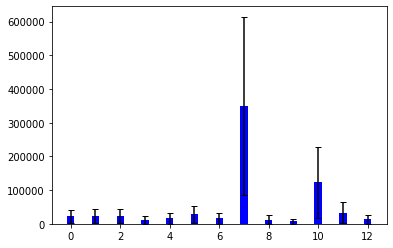

In [ ]:
#for sim 1
party_bar(list(qhat_avg.iloc[0]),temp_df,temp_df/temp_df.sum(),q_hat_var.iloc[0],temp_df)
#for sim 2
party_bar(list(qhat_avg.iloc[1]),temp_df,temp_df/temp_df.sum(),q_hat_var.iloc[1],temp_df)
#for sim 3
party_bar(list(qhat_avg.iloc[2]),temp_df,temp_df/temp_df.sum(),q_hat_var.iloc[2],temp_df)

#
